In [1]:
# Import libraries

import pandas as pd 
import numpy as ny 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import plotly.express as px 

In [2]:
# Load dataset 

df = pd.read_csv(r"C:\Users\Minich\OneDrive\Desktop\Data Analysis\Linear Regression\Housing price prediction.csv")

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# Data Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# drop columns 
df = df.drop(columns={'Address'})
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [5]:
# Rename columns 
df = df.rename(columns={'Avg. Area Income':'Avg. Income', 
                        'Avg. Area House Age':'Avg. House Age', 
                        'Avg. Area Number of Rooms':'Avg. Number of Rooms', 
                        'Avg. Area Number of Bedrooms':'Avg. Number of Bedrooms',
})

df.head()

,Avg. Income,Avg. House Age,Avg. Number of Rooms,Avg. Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


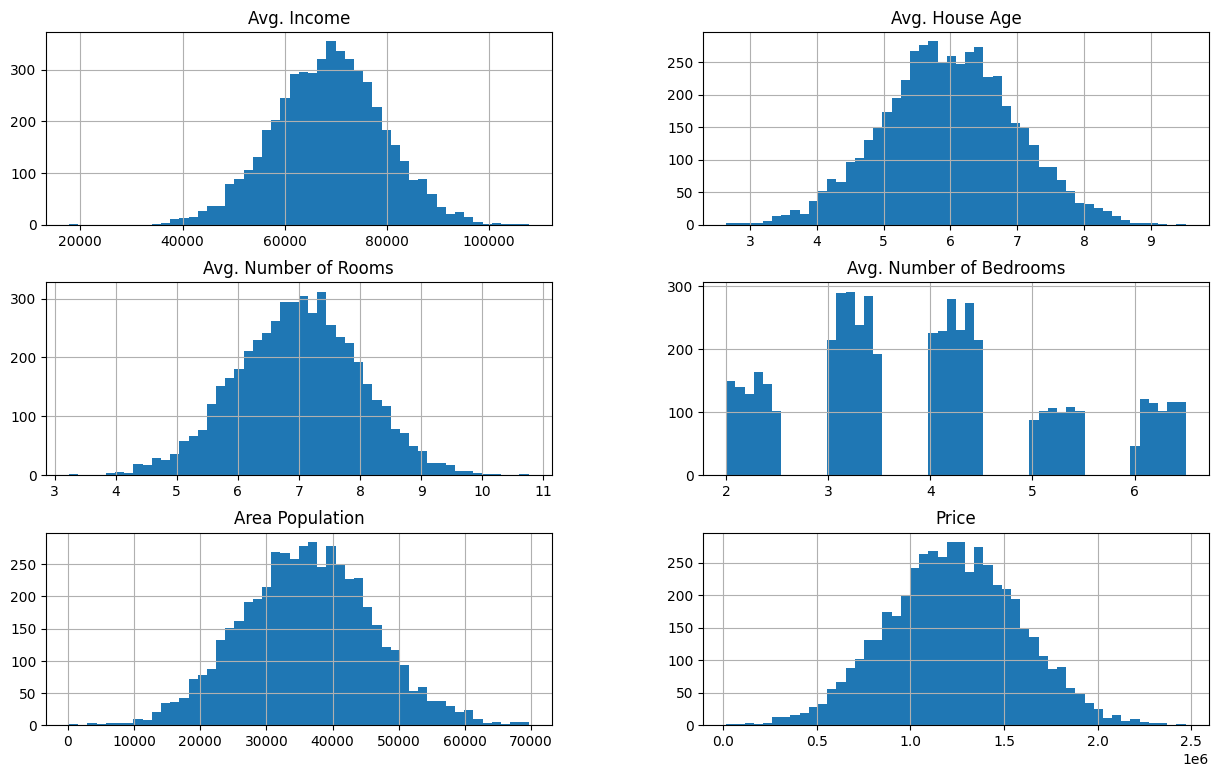

In [6]:
df.hist(bins=50, figsize=(15, 9))

plt.show()

In [7]:
print(df.columns)


Index(['Avg. Income', 'Avg. House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


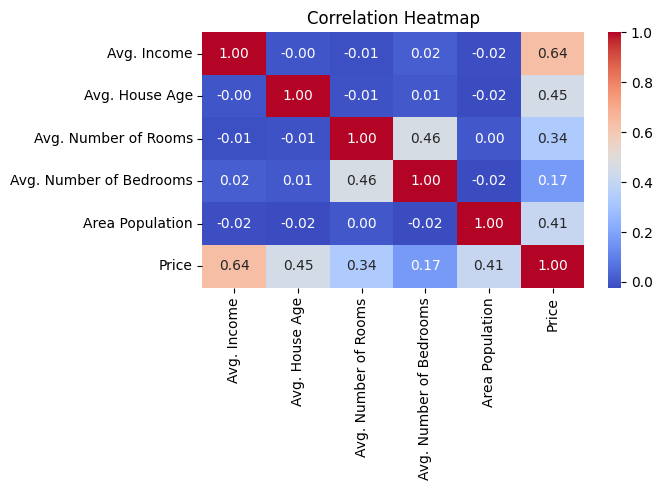

In [8]:
# Correlations within attributes

corr_matrix = df[['Avg. Income', 'Avg. House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population', 'Price']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

In [9]:
# Data Preprocessing: Defining features and target variable 
 
X = df[['Avg. Income', 'Avg. House Age', 'Avg. Number of Rooms', 'Avg. Number of Bedrooms', 'Area Population']]

y = df['Price']

In [10]:
from sklearn.model_selection import train_test_split

## Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,)


In [11]:
# Importing the standard scaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[ 0.4128736 ,  1.59776595,  1.10672038,  0.1728223 ,  0.72680317],
        [-1.85718255, -1.09146679, -0.10599054, -1.45241149, -0.52333887],
        [ 0.22819435,  1.22626504, -0.42482495,  0.31836563, -0.55037565],
        ...,
        [-1.70194026, -1.22842188,  0.24736382,  1.66059851, -0.28064516],
        [ 0.18368631, -1.22126565,  0.30887504,  0.16473656, -0.44650023],
        [ 0.18898285,  1.91234754,  0.70866996,  0.81968152, -1.20443685]]),
 array([[ 0.52540985, -1.33442941, -2.27482999,  0.26985119,  0.14494805],
        [-0.37500525, -0.40700906, -0.56005546,  0.36688007, -1.75323261],
        [-0.36660831,  0.39841797, -1.03575521, -1.43624001, -1.26032081],
        ...,
        [ 0.85696015,  0.88128753, -0.67759148, -0.67618043,  1.02936608],
        [ 0.44288992,  0.56266864,  0.59073519,  1.60399833, -0.82960509],
        [ 0.16345882,  1.48490213,  1.01568105,  1.74954165,  1.78024557]]))

In [12]:
# Regression modelling 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear regression 
regression = LinearRegression()

# Train the model
regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
reg_pred = regression.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, reg_pred)
mse = mean_squared_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2:", r2)

Mean Absolute Error: 80137.01130230987
Mean Squared Error: 9938071931.186262
R2: 0.9187873791429981


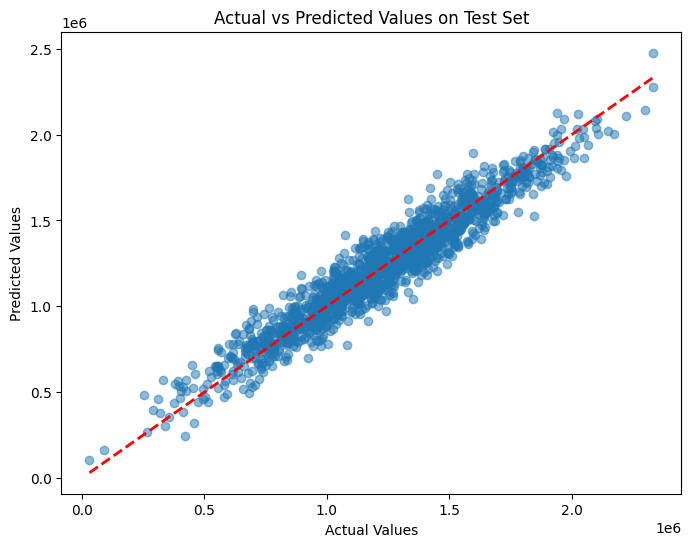

In [13]:
# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, reg_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
plt.title('Actual vs Predicted Values on Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [14]:
# Model evaluation 
# Residuals
residuals = y_test - reg_pred
residuals

960    -32209.282157
3622    53917.532675
4072    32317.850938
1233    20914.286593
3390    51176.166616
            ...     
2987   -90773.643664
4685   -12769.224572
3634   -53141.884412
1159   -96968.669043
1692   -65457.736941
Name: Price, Length: 1500, dtype: float64

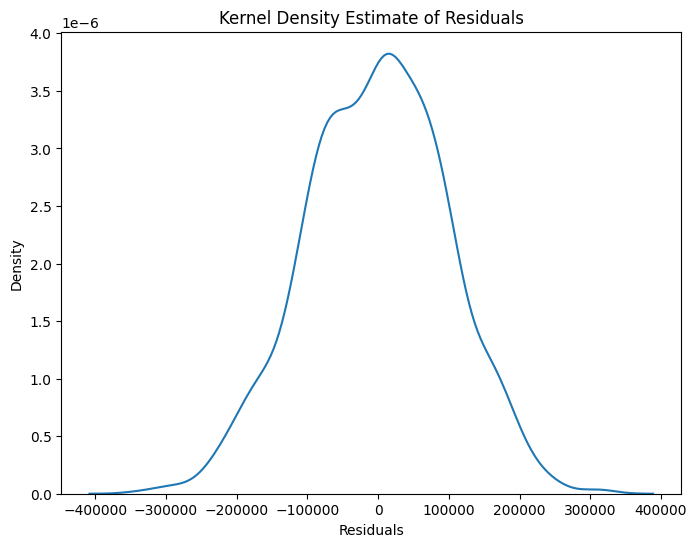

In [15]:
# Plot the residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals)

# Labels
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Residuals")

# Show the plot
plt.show()

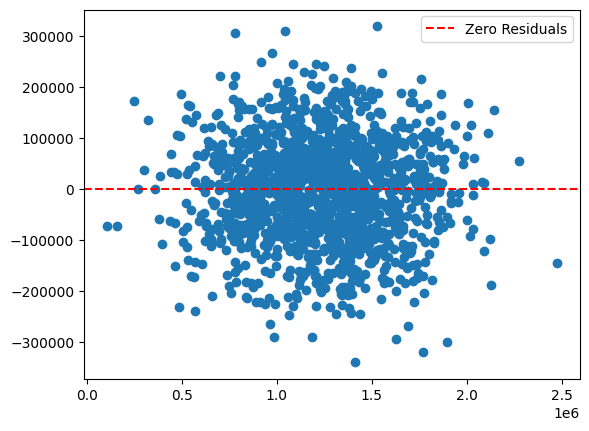

In [16]:
plt.scatter(reg_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.legend()

In [17]:
# Example prediction using the model 
row_to_predict = X.iloc[0].values.reshape(1, -1)

# Use the same scaler to transform the input row
scaled_row = scaler.transform(row_to_predict)

# Use the trained regression model to predict the house price
predicted_price = regression.predict(scaled_row)

print("Predicted House Price:", predicted_price[0])

Predicted House Price: 1224222.8066193094


e:\Machine Learning Projects\House Price Prediction\housingpriceprediction\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# # Model pickling 
# import pickle

# # Save the random forest model to a file
# with open('regression.pkl', 'wb') as file:
#     pickle.dump(regression, file)

In [19]:
# # Using pickled file for prediction

# # Specify the file path and name
# pickle_file_path = 'regression.pkl'

# # Load the pickled model using gzip
# with open(pickle_file_path, 'rb') as file:
#     linmodel = pickle.load(file)

# # Predict
# linmodel.predict(scaler.transform(row_to_predict))

In [22]:
import joblib

# Save the scaler to a pickled file with the name 'scalar.pkl'
scaler_filename = 'scalar.pkl'
joblib.dump(scaler, scaler_filename)

# Save the regression model to a pickled file
model_filename = 'linear_regression_model.pkl'
joblib.dump(regression, model_filename)

print(f"Scaler saved to {scaler_filename}")
print(f"Regression model saved to {model_filename}")

Scaler saved to scalar.pkl
Regression model saved to linear_regression_model.pkl
